In [1]:
from keras.applications import vgg16, vgg19, ResNet50
from tensorflow.keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
!unzip book_covers.zip

Archive:  book_covers.zip
   creating: content/book_covers/
  inflating: content/book_covers/book_971.jpg  
  inflating: content/book_covers/book_2004.jpg  
  inflating: content/book_covers/book_2367.jpg  
  inflating: content/book_covers/book_2344.jpg  
  inflating: content/book_covers/book_3907.jpg  
  inflating: content/book_covers/book_444.jpg  
  inflating: content/book_covers/book_2948.jpg  
  inflating: content/book_covers/book_1448.jpg  
  inflating: content/book_covers/book_646.jpg  
  inflating: content/book_covers/book_60.jpg  
  inflating: content/book_covers/book_3659.jpg  
  inflating: content/book_covers/book_2755.jpg  
  inflating: content/book_covers/book_1349.jpg  
  inflating: content/book_covers/book_2655.jpg  
  inflating: content/book_covers/book_2829.jpg  
  inflating: content/book_covers/book_1441.jpg  
  inflating: content/book_covers/book_1220.jpg  
  inflating: content/book_covers/book_1173.jpg  
  inflating: content/book_covers/book_2572.jpg  
  inflating: c

# Cargamos la CNN pre-entrenada en ImageNet


In [3]:
# cargamos el modelo escoger

modelo_escogido = 'vgg19' #@param["vgg16", "vgg19"]

if modelo_escogido == 'vgg16':
  # cargar modelo
  vgg_model = vgg16.VGG16(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

elif modelo_escogido == 'vgg19':
  # cargar modelo
  vgg19_model = vgg19.VGG19(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()



574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 139,570,240 (532.42 MB)

 Trainable params: 139,570,240 (532.42 MB)

 Non-trainable params: 0 (0.00 B)

## Procesamiento de imágenes para dárselas como input a la CNN

In [4]:
imgs_path = "content/book_covers/" # ruta

imgs_model_width, imgs_model_height = 224, 224 # tamaño de las imagenes 224x224 pixeles

nb_closest_images = 10 # cantidad de imagenes similares a recomendar

In [5]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
print("total de imagenes:",len(files))

total de imagenes: 4287


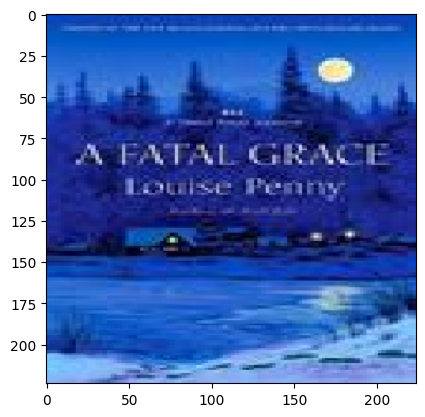

In [6]:
# vemos imagen aleatoria
import random

idx =  random.randint(0, len(files))
original = load_img(files[idx], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()

In [7]:
# repetimos el mismo proceso para todas las imagenes y guardamos los batch en una lista para entregarselos procesados a la VGG16
importedImages = []
imgs_features = []
# procesamos por batches si no se llena la memoria
file_batch_size = 500
n_batches = len(files) // file_batch_size
print(f"No. of batches: {n_batches}")

for i, f in enumerate(files):
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

    if i > 0 and i % file_batch_size == 0:
      images = np.vstack(importedImages)
      importedImages = []

      processed_imgs = preprocess_input(images.copy())
      # obtenemos los features para cada imagen del batch con la CNN
      batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
      print(f"batch {i // file_batch_size} features extracted!")

      imgs_features.append(batch_imgs_features)

# process remaining images
if len(importedImages) > 0:
    images = np.vstack(importedImages)
    processed_imgs = preprocess_input(images.copy())
    # obtenemos los features para cada imagen del batch con la CNN
    batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
    print(f"remaining images features extracted!")

    imgs_features.append(batch_imgs_features)


No. of batches: 8
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step
batch 1 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step
batch 2 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
batch 3 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
batch 4 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
batch 5 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
batch 6 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step
batch 7 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step
batch 8 features extracted!
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step
remaining images features extracted!


In [8]:
# join all subarrays of imgs_features
imgs_features = np.concatenate(imgs_features, axis=0)
print(imgs_features.shape)

(4287, 4096)


In [9]:
# computa similaridad coseno entre los features de las imagenes
cosSimilarities = cosine_similarity(imgs_features)

# guardamos los resultados en un dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df #.head()

,content/book_covers/book_3544.jpg,content/book_covers/book_1693.jpg,content/book_covers/book_4024.jpg,content/book_covers/book_1028.jpg,content/book_covers/book_3223.jpg,content/book_covers/book_3199.jpg,content/book_covers/book_183.jpg,content/book_covers/book_3476.jpg,content/book_covers/book_3638.jpg,content/book_covers/book_1896.jpg,...,content/book_covers/book_1984.jpg,content/book_covers/book_611.jpg,content/book_covers/book_1997.jpg,content/book_covers/book_3831.jpg,content/book_covers/book_1364.jpg,content/book_covers/book_3258.jpg,content/book_covers/book_306.jpg,content/book_covers/book_69.jpg,content/book_covers/book_3911.jpg,content/book_covers/book_4275.jpg
content/book_covers/book_3544.jpg,1.000000,0.347102,0.503303,0.390865,0.397659,0.503349,0.574375,0.332124,0.326384,0.495472,...,0.392876,0.303937,0.501177,0.482787,0.233007,0.376961,0.408579,0.220689,0.438447,0.418433
content/book_covers/book_1693.jpg,0.347102,1.000000,0.268761,0.281363,0.349299,0.303671,0.288237,0.236211,0.213446,0.316638,...,0.235662,0.221379,0.375501,0.302908,0.241822,0.275055,0.264290,0.177892,0.233616,0.276496
content/book_covers/book_4024.jpg,0.503303,0.268761,1.000000,0.268755,0.276071,0.384566,0.478550,0.281832,0.329878,0.384788,...,0.434378,0.321717,0.342352,0.432463,0.260089,0.277145,0.408385,0.228871,0.379711,0.454265
content/book_covers/book_1028.jpg,0.390865,0.281363,0.268755,1.000000,0.276026,0.351373,0.333330,0.193362,0.180054,0.326897,...,0.214544,0.197983,0.296789,0.206993,0.299751,0.238007,0.255474,0.124582,0.226137,0.270848
content/book_covers/book_3223.jpg,0.397659,0.349299,0.276071,0.276026,1.000000,0.323101,0.326375,0.213853,0.474013,0.442605,...,0.385698,0.298625,0.523094,0.575033,0.152866,0.198222,0.405452,0.269319,0.356932,0.328249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content/book_covers/book_3258.jpg,0.376961,0.275055,0.277145,0.238007,0.198222,0.306842,0.311319,0.324454,0.129837,0.238728,...,0.268325,0.256980,0.320798,0.203806,0.358802,1.000000,0.296125,0.154233,0.204509,0.173065
content/book_covers/book_306.jpg,0.408579,0.264290,0.408385,0.255474,0.405452,0.391350,0.456098,0.390646,0.318587,0.243313,...,0.431055,0.218629,0.514795,0.481401,0.252240,0.296125,1.000000,0.255730,0.287985,0.360747
content/book_covers/book_69.jpg,0.220689,0.177892,0.228871,0.124582,0.269319,0.207905,0.235752,0.238812,0.253242,0.303867,...,0.297626,0.220939,0.220192,0.266867,0.143645,0.154233,0.255730,1.000000,0.171423,0.188474
content/book_covers/book_3911.jpg,0.438447,0.233616,0.379711,0.226137,0.356932,0.341200,0.417100,0.257323,0.353703,0.367074,...,0.454803,0.416784,0.409687,0.369716,0.224970,0.204509,0.287985,0.171423,1.000000,0.359066


In [28]:
# esta funcion recupera las imagenes más similares dada una imagen entregada por el usuario
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("libro escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("libros más similares:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("score de similaridad : ",closest_imgs_scores[i])

# esta funcion recupera las imagenes más similares dada una imagen entregada por el usuario
def recommend(given_index, nb_closest_images):

    closest_imgs = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1]

    closest_imgs = closest_imgs.to_numpy()
    closest_imgs_scores = closest_imgs_scores.to_numpy()
    recs = [(img, score) for img, score in zip(closest_imgs, closest_imgs_scores)]

    return recs

1554
content/book_covers/book_3062.jpg
-----------------------------------------------------------------------
libro escogido:


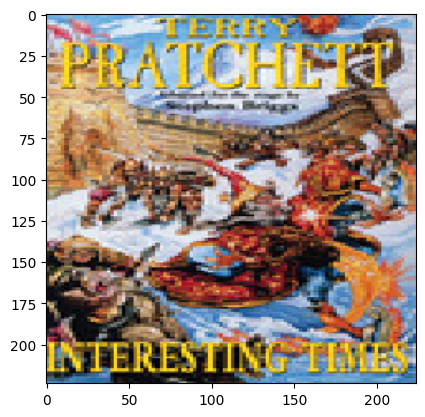

-----------------------------------------------------------------------
libros más similares:


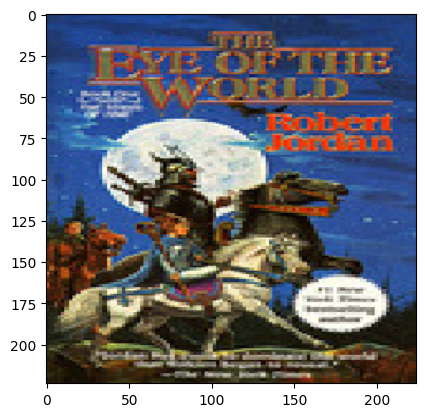

score de similaridad :  0.73122185


<ipython-input-10-45e7e6c281d9>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("score de similaridad : ",closest_imgs_scores[i])


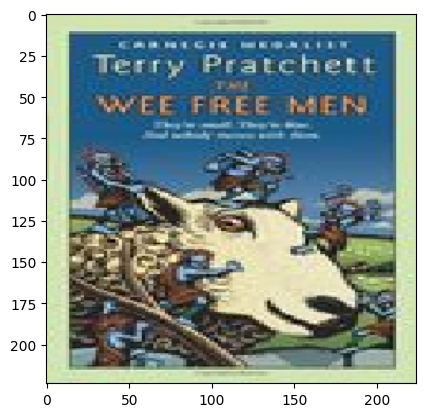

score de similaridad :  0.7086652


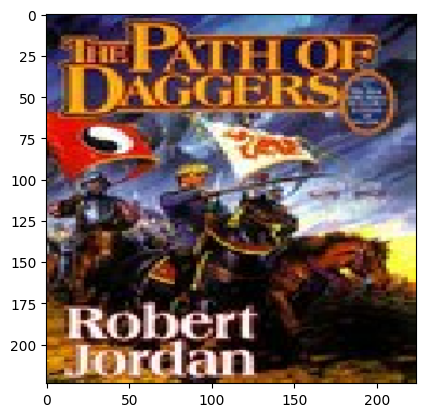

score de similaridad :  0.6889649


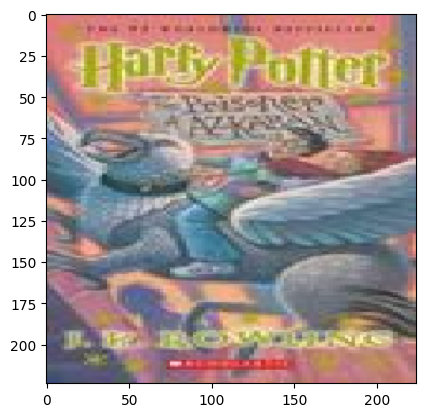

score de similaridad :  0.6699694


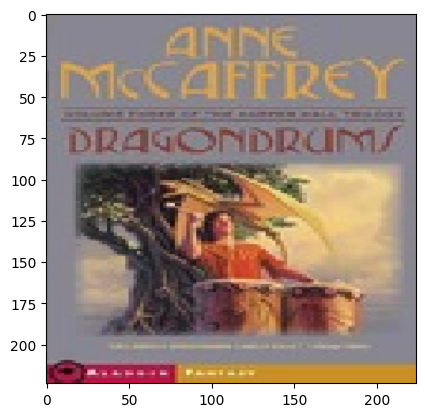

score de similaridad :  0.666748


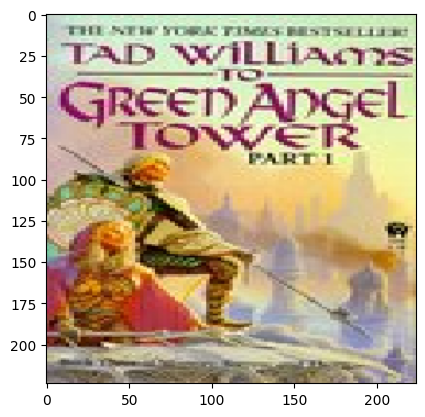

score de similaridad :  0.6666315


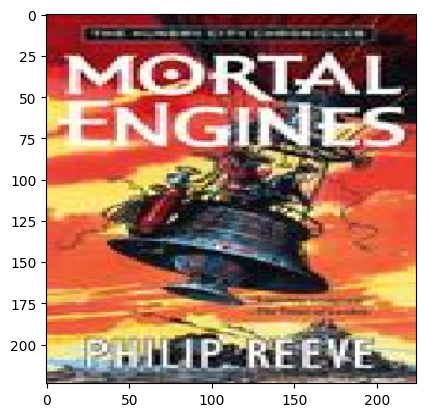

score de similaridad :  0.6659533


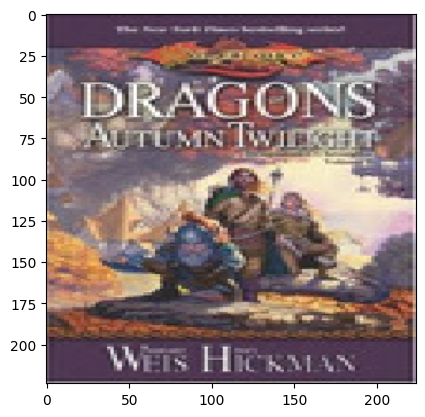

score de similaridad :  0.6640372


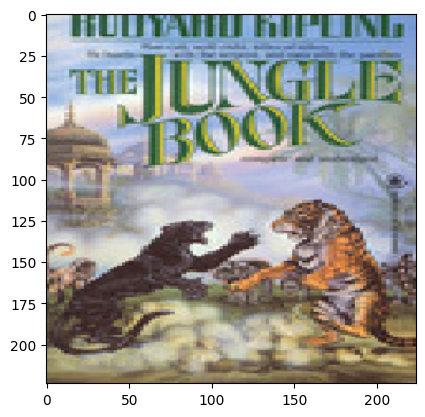

score de similaridad :  0.658463


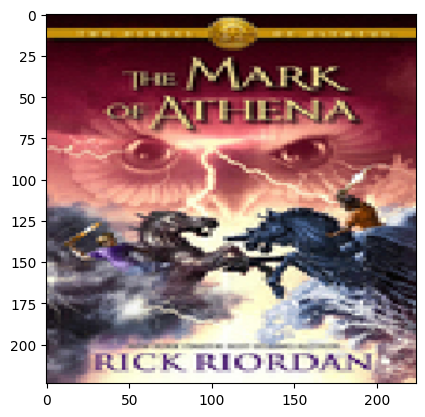

score de similaridad :  0.65748924


In [11]:
idx = random.randint(0, len(files))
print(idx)
idx_recs = recommend(files[idx])
print(files[idx])
retrieve_most_similar_products(files[idx])

In [12]:
print(idx_recs[0], idx_recs[0][0])
idx_0 = int(idx_recs[0][0].strip('content/book_covers/').strip('.jpg'))
print(idx_0)

('content/book_covers/book_248.jpg', np.float32(0.73122185)) content/book_covers/book_248.jpg
248


In [13]:
set([('content/book_covers/book_3006.jpg', np.float32(0.58404464)), ('content/book_covers/book_3006.jpg', np.float32(0.58404464))])

{('content/book_covers/book_3006.jpg', np.float32(0.58404464))}

In [14]:
!wget https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0 -O books.csv
!wget https://www.dropbox.com/s/dqeqpsr0vdvmcy0/goodreads_past_interactions.json?dl=0 -O goodreads_past_interactions.json
!wget https://www.dropbox.com/s/rjtzhmb2zbpp30q/goodreads_test_interactions.json?dl=0 -O goodreads_test_interactions.json

--2025-06-06 01:59:42--  https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/5s6xrfnu17yi34sfhmskb/books.csv?rlkey=ymzokbyqw3qq2bq5okfao9w1z&dl=0 [following]
--2025-06-06 01:59:42--  https://www.dropbox.com/scl/fi/5s6xrfnu17yi34sfhmskb/books.csv?rlkey=ymzokbyqw3qq2bq5okfao9w1z&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb40408e560d08126370aa075ab.dl.dropboxusercontent.com/cd/0/inline/CrFJhAPqgZ840e9p-HPhiOB0W4jdHWJVrX6ZEY83V4ooBhPc3zN7lVydlniAN3oHsLuz8mzilrguPFc00yUUizi_NleLIuUrieX5NumHaX9HE7eAj3lAPOeYjKtKdjsh6f31VLXPvu2EToNrG_lnTX7P/file# [following]
--2025-06-06 01:59:43--  https://ucb40408e560d08126370aa075ab.dl.dropboxusercontent.com/cd/0

In [15]:
df_books = pd.read_csv('books.csv', sep=',')
# dict index 2 book id and vice-versa for recommendation
idx2bookid = {i: id_ for i, id_ in enumerate(df_books.book_id)}
bookid2idx = {id_:i for i, id_ in enumerate(df_books.book_id)}

In [16]:
import json
with open("goodreads_past_interactions.json", "r") as f:
    user_interactions = json.load(f)

idx2userid = {i: id_ for i, id_ in enumerate(user_interactions.keys())}
userid2idx = {id_:i for i, id_ in enumerate(user_interactions.keys())}

In [17]:
with open("goodreads_test_interactions.json", "r") as f:
    user_interactions_test = json.load(f)

In [20]:
from scipy.sparse import coo_matrix
max_user_id = []
max_item_id = []

for user_id, book_ids in user_interactions.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        max_user_id.append(int(u_id))
        max_item_id.append(int(b_id))

max_user_id = max(max_user_id)
max_item_id = max(max_item_id)

rows_test = []
cols_test = []
data_test = []

for user_id, book_ids in user_interactions_test.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows_test.append(int(u_id))
        cols_test.append(int(b_id))
        data_test.append(1)

max_user_id = max([max_user_id] + rows_test)
max_item_id = max([max_item_id] + cols_test)

test_users = list(set(rows_test))

# Crear matriz sparse
user_item_matrix_test = coo_matrix((data_test, (rows_test, cols_test)), shape=(max_user_id + 1, max_item_id + 1))
print(user_item_matrix_test.shape)

(52821, 4287)


## Generar recomendaciones

Para cada usuario, generar recomendaciones basadas en similitud de portadas para su historial de libros.

In [33]:
recs = []
counter = 0
nb_closest_images = 10
for user in test_users:
  user = idx2userid[user]
  past_interactions = user_interactions[user]
  user_recs = []
  rec_tuples = set()
  # obtener libros similares para cada libro
  # con el que el usuario ha interactuado anteriormente
  for book_id in past_interactions:
    book_idx = bookid2idx[book_id]
    results = set(recommend(files[book_idx], nb_closest_images)) # para sacar duplicados
    rec_tuples = rec_tuples.union(results)
  rec_tuples = list(rec_tuples)
  rec_tuples.sort(key=lambda x: x[1], reverse=True) # ordenar por similaridad
  rec_tuples = rec_tuples[:nb_closest_images] # quedarse con las primeras n
  for rec in rec_tuples:
    ### IMPORTANTE
    # convertir el nombre del archivo al indice del libro (idx)
    # en este caso el numero del nombre del archivo
    # es el numero de la fila del dato de books.csv
    # (parece que son lo mismo)
    row = int(rec[0].strip('content/book_covers/').strip('.jpg'))
    book_id = df_books.book_id[row]
    user_recs.append(bookid2idx[book_id])
  recs.append(user_recs)
  counter += 1
  #if counter > 20:
  #  break

print(recs[:2])

[[2112, 440, 4283, 1902, 3417, 2329, 874, 3736, 2161, 361], [3040, 2667, 3094, 2526, 3565, 150, 3211, 633, 1507, 1383]]


In [23]:
# funcion para calcular metricas dadas las recomendaciones ya hechas
def recs_ranking_metrics_at_k(recommendations, test_user_items, K=10):

    # Ensure matrices are in CSR format
    #train_user_items = train_user_items.tocsr()
    test_user_items = test_user_items.tocsr()

    num_users, num_items = test_user_items.shape
    relevant = 0
    total_precision_div = 0
    total_map = 0
    total_ndcg = 0
    total_auc = 0
    total_users = 0

    # Compute cumulative gain for NDCG normalization
    cg = 1.0 / np.log2(np.arange(2, K + 2))  # Discount factor
    cg_sum = np.cumsum(cg)  # Ideal DCG normalization

    # Get users with at least one item in the test set
    users_with_test_data = np.where(np.diff(test_user_items.indptr) > 0)[0]

    # Progress bar
    #progress = tqdm.tqdm(total=len(users_with_test_data), disable=not show_progress)

    batch_size = 1000
    start_idx = 0

    while start_idx < len(users_with_test_data):
        batch_users = users_with_test_data[start_idx:start_idx + batch_size]
        #recommended_items, _ = model.recommend(batch_users, train_user_items[batch_users], N=K)
        recommended_items = recommendations[start_idx:start_idx + batch_size]
        start_idx += batch_size

        for user_idx, user_id in enumerate(batch_users):
            test_items = set(test_user_items.indices[test_user_items.indptr[user_id]:test_user_items.indptr[user_id + 1]])

            if not test_items:
                continue  # Skip users without test data

            num_relevant = len(test_items)
            total_precision_div += min(K, num_relevant)

            ap = 0
            hit_count = 0
            auc = 0
            idcg = cg_sum[min(K, num_relevant) - 1]  # Ideal Discounted Cumulative Gain (IDCG)
            num_negative = num_items - num_relevant

            for rank, item in enumerate(recommended_items[user_idx]):
                if item in test_items:
                    relevant += 1
                    hit_count += 1
                    ap += hit_count / (rank + 1)
                    total_ndcg += cg[rank] / idcg
                else:
                    auc += hit_count  # Accumulate hits for AUC calculation

            auc += ((hit_count + num_relevant) / 2.0) * (num_negative - (K - hit_count))
            total_map += ap / min(K, num_relevant)
            total_auc += auc / (num_relevant * num_negative)
            total_users += 1

        #progress.update(len(batch_users))

    #progress.close()

    # Compute final metrics
    precision = relevant / total_precision_div if total_precision_div > 0 else 0
    mean_ap = total_map / total_users if total_users > 0 else 0
    mean_ndcg = total_ndcg / total_users if total_users > 0 else 0
    mean_auc = total_auc / total_users if total_users > 0 else 0

    return {
        "precision": precision,
        "map": mean_ap,
        "ndcg": mean_ndcg,
        "auc": mean_auc
    }

In [34]:
recs_ranking_metrics_at_k(recs, user_item_matrix_test, K=nb_closest_images)

{'precision': 0.003,
 'map': 0.001253968253968254,
 'ndcg': np.float64(0.0035970991185182923),
 'auc': 0.500334346504559}